In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Рѣшеніе сѵстемъ обыкновенныхъ дифференціальныхъ уравненій перваго порядка въ формѣ задачи Коши

## Пунктъ I: построеніе численнаго рѣшенія сѵстемы ОДУ перваго порядка по методу Эйлера

### Условіе:
Пусть есть сѵстема ОДУ: $y_i' = f_i\left(x, y_1, \dots, y_n\right)$ съ начальными условіями $y_i(x_0) = c_{i}$, где $i \in \{1, \dots, n\}$.

### Рѣшеніе:
Введёмъ равномѣрную сѣтку по перемѣнной $x$: $X = \{x_0, x_0 + h, x_0 + 2 \cdot h, \dots, x_0 + n \cdot h\}$. Построимъ серію приближеній (аппроксимацій) значеній функцій $y_i$ въ точкахъ сѣтки: $y_{i,0}, y_{i,1}, \dots, y_{i,n}$ (точныя значенія: $y_i(x_0), y_i(x_0 + h), \dots, y_i(x_0 + n \cdot h)$). Представимъ производную $y_i'(x_j)$ въ точкѣ $x_j = x_0 + h \cdot j$ численно: $y_i'(x_j) \approx \frac{y_{i,j+1} - y_{i,j}}{x_{j+1} - x_j} = \frac{y_{i,j+1} - y_{i,j}}{h}$. Значеніе функціи $f_i\left(x, y_1, \dots, y_n\right)$ въ точкѣ $x_j$ можно представить какъ $f_i\left(x_j, y_{1,j}, \dots, y_{n,j}\right)$.

Такимъ образомъ, получимъ сѵстему недифференціальныхъ уравненій: $\frac{y_{i,j+1} - y_{i,j}}{h} = f_i\left(x_j, y_{1,j}, \dots, y_{n,j}\right)$ съ начальными условіями $y_{i,0} = c_{i}$. Явно видно, что значенія неизвестыхъ $y_{i,j+1}$ зависятъ только отъ значеній $y_{i,j}$: $y_{i,j+1} = y_{i,j} + h \cdot f_i\left(x_j, y_{1,j}, \dots, y_{n,j}\right)$. Такимъ образомъ, чтобы получить значенія неизвѣстныхъ $y_{i,j}$, мы можемъ просто пройтись цикломъ слѣва-направо по сѣтке (используя $j$ въ качествѣ итератора), попутно вычисляя ихъ для каждаго $j$.

In [2]:
# f – массивъ изъ n штукъ n+1-аргументныхъ функцій
# c – массивъ изъ n чиселъ (начальныя условія)
# x0 – начальное значеніе параметра x
# x1 – конечное значеніе параметра x
# seg_cnt – количество отрѣзковъ, на которые мы раздѣляемъ діапазонъ [x0, x1]
def euler_method(f, c, x0, x1, seg_cnt):
  assert len(f) == len(c)
  h = (x1 - x0) / seg_cnt # Задаемъ равномѣрную сѣтку
  y = [[ci] for ci in c] # Матрица приближенныхъ значеній рѣшеній. Начально иниціализирована столбцомъ-векторомъ

  for j in range(1, seg_cnt + 1):
    xj = x0 + j * h
    y_last = [yi[-1] for yi in y] # Предыдущія значенія (въ узлѣ x_{j-1})

    # Новыя значенія (въ узлѣ x_j)
    for i in range(len(f)):
      y[i].append(y_last[i] + h * f[i](xj, *y_last))
    
  x = [x0 + h * i for i in range(seg_cnt + 1)]
  return x, *y

## Пунктъ II: Продолженіе рѣшенія по наилучшему параметру съ использованіемъ $\lambda$-преобразованія

### Условіе:
Аналогично первой задачѣ.

### Рѣшеніе:
Объявимъ параметръ $\lambda$ такой, что отъ него будетъ зависеть параметръ $x = x(\lambda)$, а также и всѣ неизвѣстныя значенія $y_i(x) = y_i(x(\lambda)) = y_i(\lambda)$. Параметръ этотъ выберемъ не абы-какой, а наилучшій, удовлетворяющій соотношенію $(d\lambda)^2 = (dy_1)^2 + \dots + (dy_n)^2 + (dx)^2$. Подставимъ исходныя уравненія ($dy_i = dx \cdot f_i\left(x, y_1, \dots, y_n\right)$) въ это соотношеніе и получимъ: $\frac{d\lambda}{dx} = \pm \sqrt{1 + \sum_{i = 1}^{n}{f_i^2}}$, или же $\frac{dx}{d\lambda} = \pm \frac{1}{\sqrt{1 + \sum_{i = 1}^{n}{f_i^2}}}$. Съ учётомъ $\frac{dy_i}{d\lambda} = \frac{dy_i}{dx} \cdot \frac{dx}{d\lambda}$, получимъ $\frac{dy_i}{d\lambda} = \pm \frac{f_i}{\sqrt{1 + \sum_{i = 1}^{n}{f_i^2}}}$.

Такимъ образомъ, выходитъ, что послѣ $\lambda$-преобразованія, мы получили новую сѵстему из $n + 1$ ОДУ (а вѣрнѣе, новую задачу Коши):

$
\begin{equation}
    \begin{cases}
      \frac{dx}{d\lambda} = \pm \frac{1}{\sqrt{1 + \sum_{j = 1}^{n}{f_j^2}}} \\
      \frac{dy_i}{d\lambda} = \pm \frac{f_i}{\sqrt{1 + \sum_{j = 1}^{n}{f_j^2}}}
    \end{cases}
\end{equation}
$

Такъ какъ параметръ мы опредѣлили въ дифференціальной формѣ, мы вольны выбрать произвольную константу интегрированія, или же зафиксировать его значеніе въ какой-то единой точкѣ. Напримѣръ, зафиксируемъ $\lambda_0 = 0$. Получимъ новыя начальныя условія: $x(\lambda_0) = x(0) = x_0$, $y_i(\lambda_0) = y_i(0) = c_i$.

_Примѣчаніе: геометрическій смыслъ параметра $\lambda$ – длина кривой рѣшенія въ $n+1$-мѣрномъ пространстве._

Наконецъ, рѣшимъ эту сѵстему съ использованіемъ обычнаго метода Эйлера.

In [3]:
# f – массивъ изъ n штукъ n+1-аргументныхъ функцій
# c – массивъ изъ n чиселъ (начальныя условія)
# x0 – начальное значеніе исходнаго параметра x
# length – полная длина части кривой рѣшенія, которая насъ интересуетъ 
# seg_cnt – количество отрѣзковъ, на которые мы разделяемъ діапазонъ [0, length]
def lambda_transformation(f, c, x0, length, seg_cnt):
  # Дифференціалъ прошлаго параметра по новому (dx/dl):
  # (Аргументъ l здѣсь нуженъ для совмѣстимости съ имплементаціей метода Эйлера решенія ОДУ)
  dxdl = lambda l, x, *y : 1 / math.sqrt(1 + sum([math.pow(fi(x, *y), 2) for fi in f]))

  # Массивы функцій послѣ преобразованія и ихъ начальных условій (n + 1 штука):
  # (Вниманіе: захватъ fi=fi въ лямбда-выраженіи обязателенъ!)
  new_f = [dxdl] + [lambda l, x, *y, fi=fi : fi(x, *y) * dxdl(l, x, *y) for fi in f]
  new_c = [x0] + c

  # Въ концѣ концовъ, делегируемъ вычисленіе отвѣта методу Эйлера:
  l, x, *y = euler_method(new_f, new_c, 0, length, seg_cnt)
  return x, *y

# Рѣшеніе дифференціальныхъ уравненій $n$-аго порядка свѣденіемъ къ сѵстемѣ ОДУ 1-аго порядка

## Условіе:
Дано ОДУ $n$-аго порядка: $y^{(n)} = f\left(x, y(x), y'(x), \dots, y^{(n-1)}\right)$ съ начальными условіями $y(x_0) = c_1, \dots, y^{(n - 1)} = c_{n}$.

## Рѣшеніе:
Преобразуемъ ОДУ n-аго порядка къ сѵстемѣ изъ $n$ обыкновенныхъ дифференціальныхъ уравненій перваго порядка съ использованіемъ замѣны $\forall i \in \{1, \dots, n\} : y^{(i - 1)} = y_i$:

$
\begin{equation}
    \begin{cases}
      y_1' = y_2 \\
      y_2' = y_3 \\
      \cdots \\
      y_n' = f(x, y_1, \dots, y_n)
    \end{cases}
\end{equation}
$

Новыя начальныя условія: $\forall i \in \{1, \dots, n\} : y_i(x_0) = c_i$.

In [4]:
# func – функція, принимающая n аргументовъ
# c – массивъ изъ n чиселъ (начальныя условія)
# x0 – начальное значеніе исходнаго параметра x
# length – полная длина части кривой рѣшенія, которая насъ интересуетъ 
# seg_cnt – количество отрѣзковъ, на которые мы раздѣляемъ діапазонъ [0, length]
def transform_equation_to_system(n, func):
  return [lambda x, *y : y[i + 1] for i in range(n - 1)] + [lambda x, *y : func(x, *y)]

# Примѣръ:

Протестируемъ работоспособность двухъ методовъ на примѣрѣ уравненія $y'' + \varepsilon y' + (1 - e^{-x}) e^{-x} = 0$ съ начальными условіями $y'(x_0) = 0$, $y(x_0) = 1$, $x_0 = 0$. Значеніе параметра $\varepsilon$ выберемъ равнымъ $0.1$, а размѣръ сѣтки, – $10^5$.

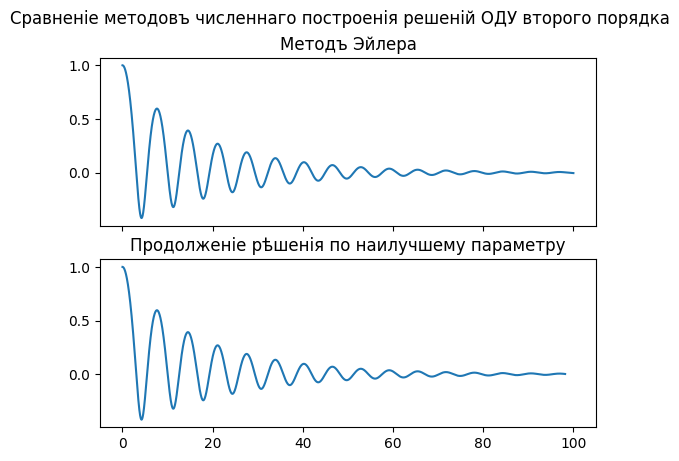

In [5]:
eps = 1e-1
func = lambda x, y0, y1 : - (eps * y1 + (1 - math.exp(-y0)) * math.exp(-y0))
system = transform_equation_to_system(2, func)

fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('Сравненіе методовъ численнаго построенія решеній ОДУ второго порядка')

for i, (method, title) in enumerate([(euler_method, 'Методъ Эйлера'), (lambda_transformation, 'Продолженіе рѣшенія по наилучшему параметру')]):
  x, y, _ = method(system, [1, 0], 0, 100, 100000)
  axs[i].plot(x, y)
  axs[i].set_title(title)

plt.show()

# Литература

При написаніи этого файла использовалась слѣдующая литература:
+ [Е. Б. Кузнецов, В. И. Шалашилин, “Задача Коши как задача продолжения решения по параметру”, Ж. вычисл. матем. и матем. физ., 33:12 (1993), 1792–1805; Comput. Math. Math. Phys., 33:12 (1993), 1569–1579](https://www.mathnet.ru/links/bc52e28c5686f826acc7aba5f5819a6a/zvmmf2626.pdf)
+ [Е.Б. Кузнецов, С.С. Леонов МЕТОД ПРОДОЛЖЕНИЯ РЕШЕНИЯ ПО ПАРАМЕТРУ В ЗАДАЧАХ НЕОБРАТИМОГО ДЕФОРМИРОВАНИЯ](http://elibrary.mai.ru/MegaPro/Download/ToView/27917?idb=NewMAI2014)